(10100, 6)
40000
40000
(40000, 3)


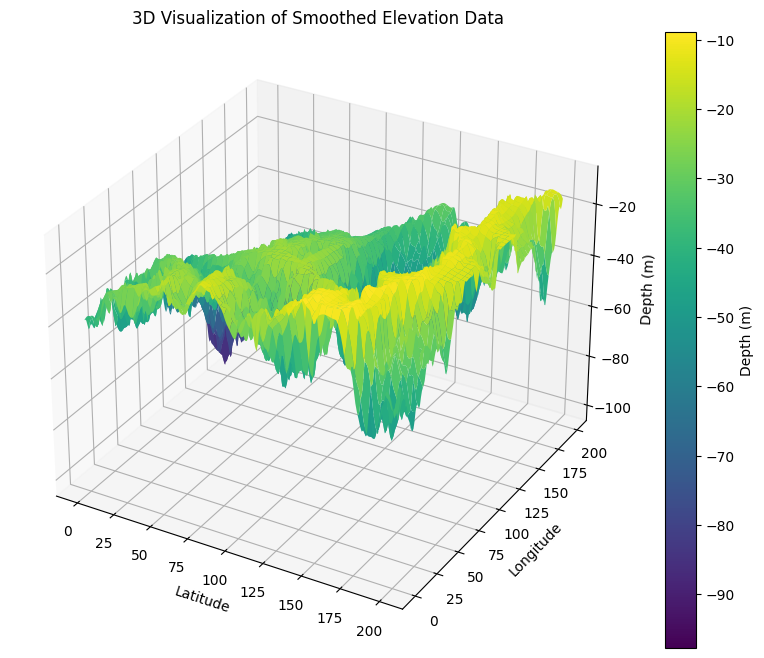

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('/content/elevation_data.csv')
print(data.shape)

latitude = data['x']
longitude = data['y']
elevation = data['z']

# Grid points for interpolation
num_points = 200  # Adjust for more or less density
grid_lat = np.linspace(data['x'].min(), data['x'].max(), num_points)
grid_long = np.linspace(data['y'].min(), data['y'].max(), num_points)
grid_lat, grid_long = np.meshgrid(grid_lat, grid_long)
print(grid_lat.size)
print(grid_long.size)

# Interpolation using griddata
elevation_interpolated = griddata((latitude, longitude), elevation, (grid_lat, grid_long), method='cubic')

# Flatten the grid data
flat_lat = grid_lat.flatten()
flat_long = grid_long.flatten()
flat_elevation = elevation_interpolated.flatten()

# New DataFrame
interpolated_df = pd.DataFrame({
    'x': flat_lat,
    'y': flat_long,
    'Interpolated_Elevation': flat_elevation
})

print(interpolated_df.shape)
output_csv_path = 'interpolated_elevation_data.csv'
interpolated_df.to_csv(output_csv_path, index=False)

# Visualization
fig = plt.figure(figsize=(10, 8))
axis = fig.add_subplot(111, projection='3d')
surf = axis.plot_surface(grid_lat, grid_long, elevation_interpolated, cmap='viridis', edgecolor='none')
axis.set_xlabel('Latitude')
axis.set_ylabel('Longitude')
axis.set_zlabel('Depth (m)')
axis.set_title('3D Visualization of Smoothed Elevation Data')
plt.colorbar(surf, axis=axis, label='Depth (m)')
plt.show()

